In [1]:
# Surpress warnings from using older version of sklearn:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import numpy as np
import pandas as pd
from itertools import accumulate

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_style('white')

In [3]:
def plot_proj(A,v,y,name=None):

    plt.scatter(A[:,0],A[:,1],label='data',c=y,cmap='viridis')

    #plt.plot(np.linspace(A[:,0].min(),A[:,0].max()),np.linspace(A[:,1].min(),A[:,1].max())*(v[1]/v[0]),color='black',linestyle='--',linewidth=1.5,label=name)
    plt.plot(np.linspace(-1,1),np.linspace(-1,1)*(v[1]/v[0]),color='black',linestyle='--',linewidth=1.5,label=name)
    # Run through all the data

    for i in range(len(A[:,0])-1):
        #data point
        w=A[i,:]

        # projection
        cv = (np.dot( A[i,:],v))/np.dot(v,np.transpose(v))*v

        # line between data point and projection
        plt.plot([A[i,0],cv[0]],[A[i,1],cv[1]],'r--',linewidth=1.5)
    plt.plot([A[-1,0],cv[0]],[A[-1,1],cv[1]],'r--',linewidth=1.5,label='projections' )
    plt.legend()
    plt.show()

In [4]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Create the toy dataset
X, y = make_circles(n_samples=1000, factor=0.01, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

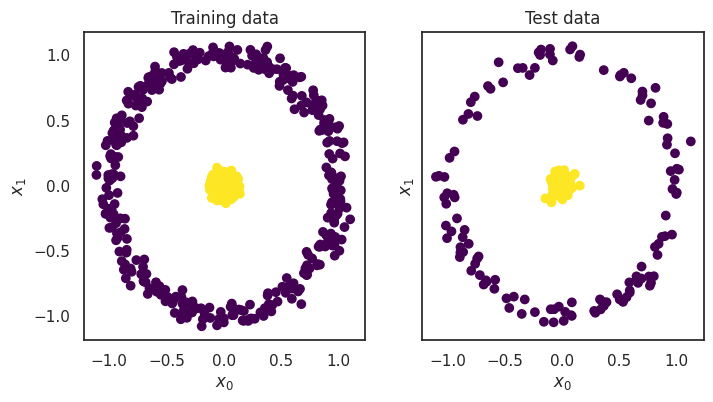

In [5]:
# Visualize the data
_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,cmap='viridis')
train_ax.set_xlabel("$x_{0}$")
train_ax.set_ylabel("$x_{1}$")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test,cmap='viridis')
test_ax.set_xlabel("$x_{0}$")
test_ax.set_ylabel("$x_{1}$")
test_ax.set_title("Test data")
plt.show()

In [6]:
from sklearn.decomposition import PCA

# Fit on a PCA object
pca = PCA(n_components=2)

score_pca = pca.fit(X_train).transform(X_test)
pca

PCA(n_components=2)

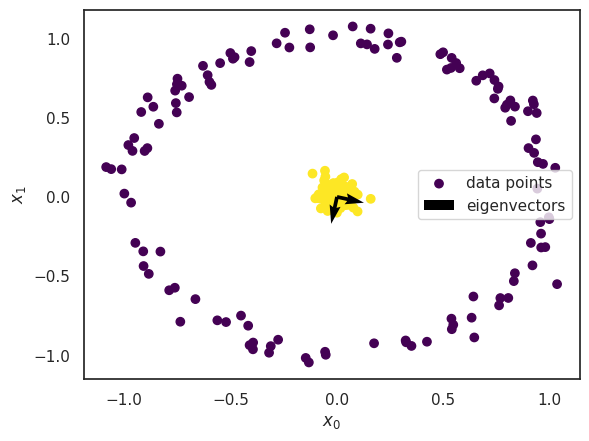

In [7]:
plt.scatter(score_pca[:, 0], score_pca[:, 1], c=y_test,label="data points", cmap='viridis')
plt.quiver([0,0],[0,0], pca.components_[0,:], pca.components_[1,:], label="eigenvectors")
plt.xlabel("$x_{0}$")
plt.ylabel("$x_{1}$")
plt.legend(loc='center right')
plt.show()

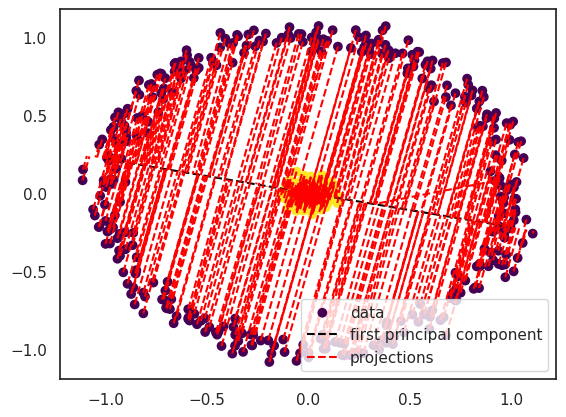

In [8]:
plot_proj(X_train,pca.components_[0,:],y_train,"first principal component")

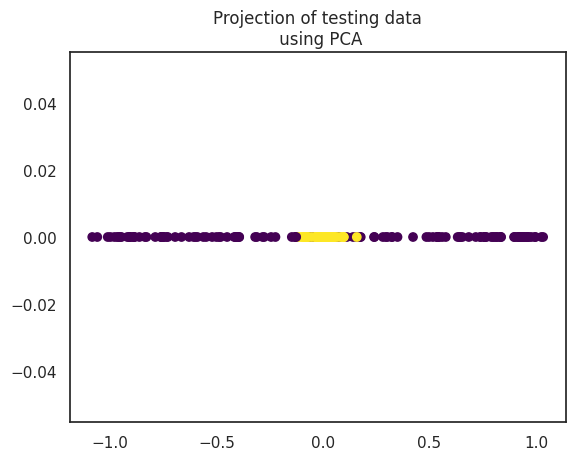

In [9]:
plt.scatter(score_pca [:,0],np.zeros(score_pca[:,0].shape[0]),c=y_test,cmap='viridis')
plt.title("Projection of testing data\n using PCA")
plt.show()

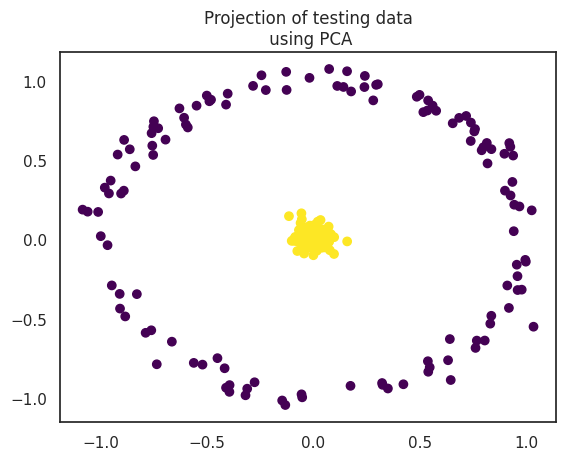

In [10]:
plt.scatter(score_pca[:, 0], score_pca[:, 1], c=y_test,cmap='viridis')
plt.title("Projection of testing data\n using PCA")
plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression().fit(X_train, y_train)
print(str.format("Test set  mean accuracy score for for PCA: {}", lr.score(X_test, y_test)))

Test set  mean accuracy score for for PCA: 0.496


In [12]:
PHI_train=np.concatenate((X_train, (X_train**2).sum(axis=1).reshape(-1,1)),axis=1)
PHI_test=np.concatenate((X_test, (X_test**2).sum(axis=1).reshape(-1,1)),axis=1)

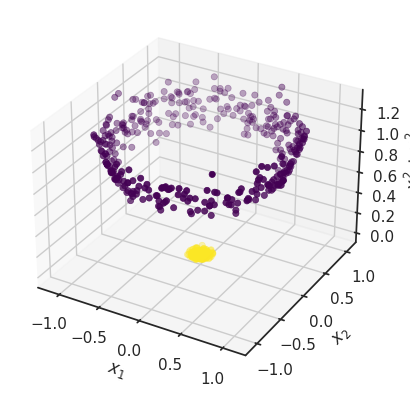

In [13]:
# Plot in 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(PHI_train[:,0], PHI_train[:,1],  PHI_train[:,2], c=y_train, cmap='viridis', linewidth=0.5);
ax.set_xlabel('$x_{1}$')
ax.set_ylabel('$x_{2}$')
ax.set_zlabel('$x_{1}^2+x_{2}^2$')
plt.show()

In [14]:
pca = PCA(n_components=3)
score_polly = pca.fit(PHI_train).transform(PHI_test)

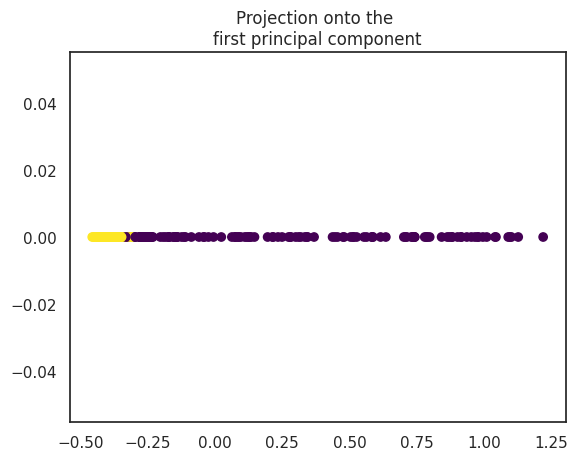

In [15]:
plt.scatter(score_polly[:,0],np.zeros(score_polly[:,1].shape[0]),c=y_test,cmap='viridis')
plt.title("Projection onto the \nfirst principal component")
plt.show()

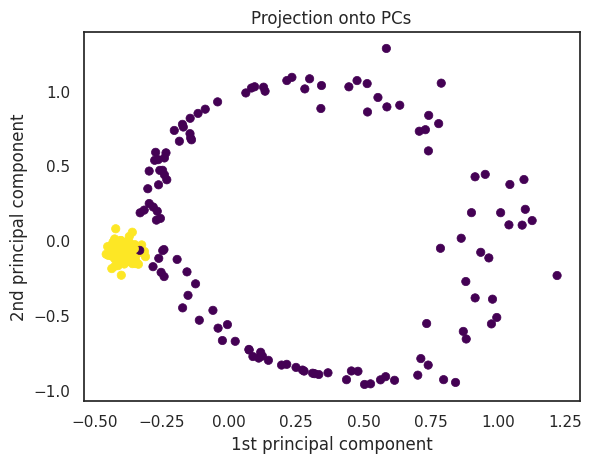

In [16]:
plt.scatter(score_polly[:,0], score_polly[:,1],c=y_test, cmap='viridis', linewidth=0.5);
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.title("Projection onto PCs")
plt.show()

In [17]:
lr= LogisticRegression().fit(PHI_train, y_train)
print(str.format("Test set  mean accuracy score for for Kernal PCA: {}", lr.score(PHI_test, y_test)))

Test set  mean accuracy score for for Kernal PCA: 1.0


In [18]:
kernel_pca = KernelPCA( kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)

In [19]:
kernel_pca.fit(X_train)

KernelPCA(alpha=0.1, fit_inverse_transform=True, gamma=10, kernel='rbf')

In [20]:
score_kernel_pca = kernel_pca.transform(X_test)

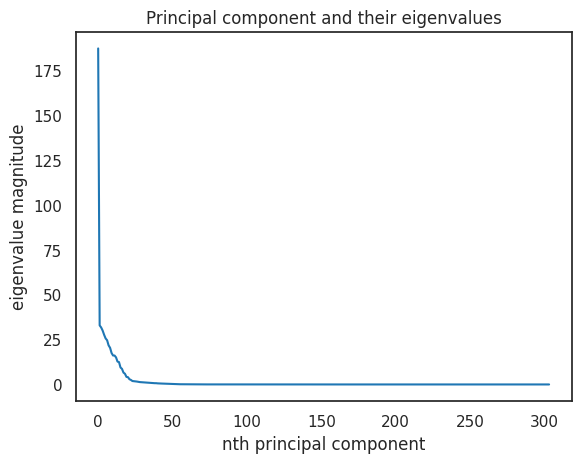

In [21]:
plt.plot(kernel_pca.eigenvalues_)

plt.title("Principal component and their eigenvalues")
plt.xlabel("nth principal component")
plt.ylabel("eigenvalue magnitude")
plt.show()

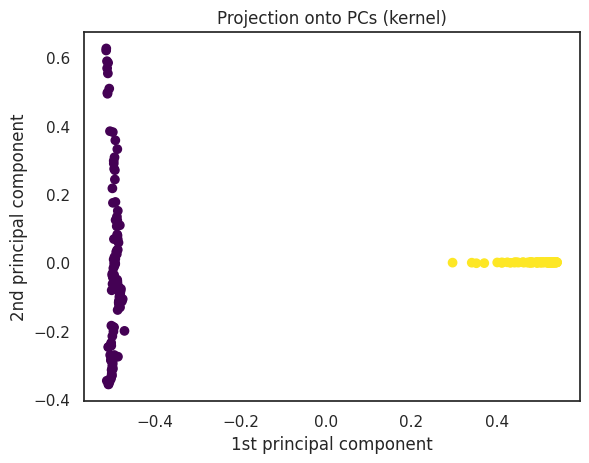

In [22]:
plt.scatter(score_kernel_pca[:,0],score_kernel_pca[:,1] ,c=y_test,cmap='viridis')
plt.title("Projection onto PCs (kernel)")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()

In [23]:
X_hat_kpca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

pca = PCA(n_components=2)
pca.fit(X_train)
X_hat_pca = pca.inverse_transform(pca.transform(X_test))

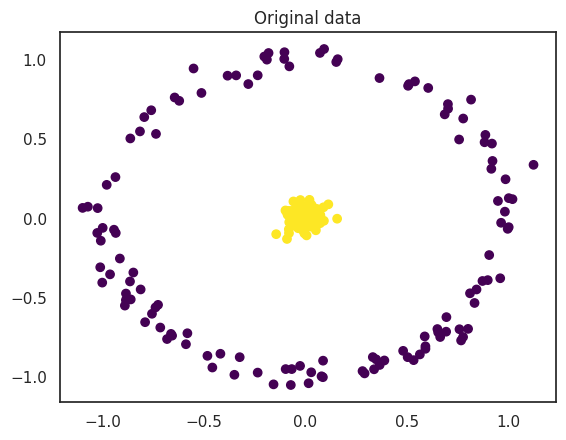

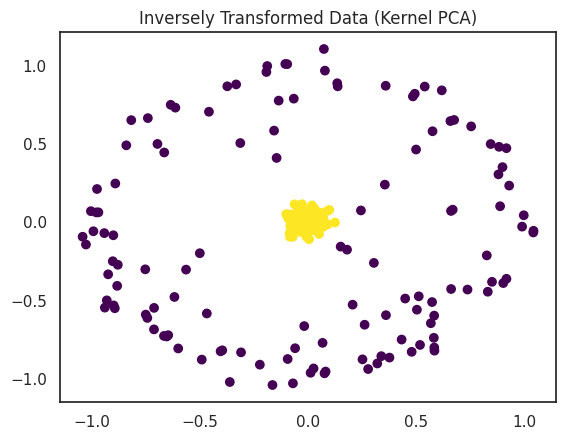

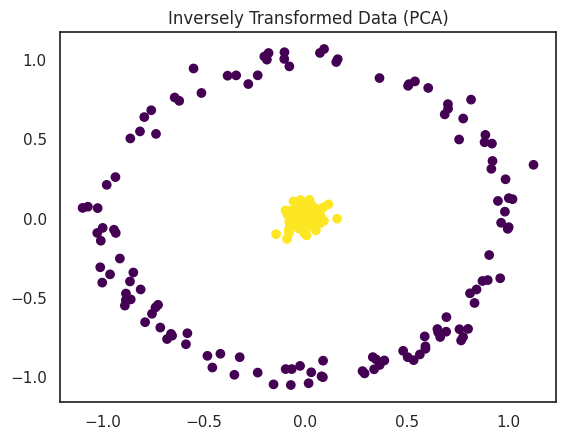

In [24]:
plt.scatter(X_test[:,0],X_test[:,1] ,c=y_test,cmap='viridis')
plt.title("Original data")
plt.show()

plt.scatter(X_hat_kpca[:,0],X_hat_kpca[:,1] ,c=y_test,cmap='viridis')
plt.title("Inversely Transformed Data (Kernel PCA)")
plt.show()

plt.scatter(X_hat_pca[:,0],X_hat_pca[:,1] ,c=y_test,cmap='viridis')
plt.title("Inversely Transformed Data (PCA)")
plt.show()

In [25]:
print("Mean squared error for Kernel PCA is:",((X_test-X_hat_kpca)**2).mean())

Mean squared error for Kernel PCA is: 0.011275231727641355


In [26]:
print("Mean squared error PCA is:" ,((X_test-X_hat_pca)**2).mean())

Mean squared error PCA is: 1.4617528040045885e-33


In [27]:
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/billionaires.csv',index_col="Unnamed: 0")
df.head()

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


In [28]:
df.shape

(2600, 7)

In [29]:
for col in df:
  print(str.format("{} has {} unique values.", col, len(df[col].unique())))

rank has 228 unique values.
name has 2598 unique values.
networth has 228 unique values.
age has 76 unique values.
country has 75 unique values.
source has 895 unique values.
industry has 18 unique values.


In [30]:
df[-100:-1]

,rank,name,networth,age,country,source,industry
2500,2448,Koo Bon-sik,$1.1 B,63,South Korea,LG,Technology
2501,2448,Suresh Krishna,$1.1 B,85,India,auto parts,Automotive
2502,2448,Nancy Lerner,$1.1 B,61,United States,"banking, credit cards",Finance & Investments
2503,2448,Norma Lerner,$1.1 B,86,United States,banking,Finance & Investments
2504,2448,Randolph Lerner,$1.1 B,60,United States,"banking, credit cards",Finance & Investments
...,...,...,...,...,...,...,...
2594,2578,Fu Gang,$1 B,51,China,pharma retailing,Healthcare
2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail


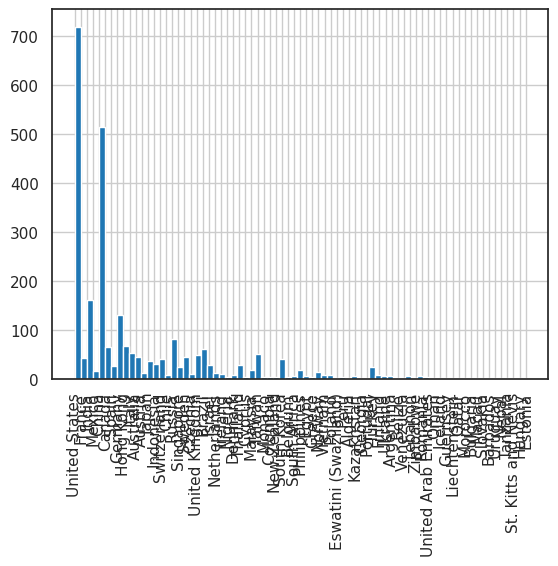

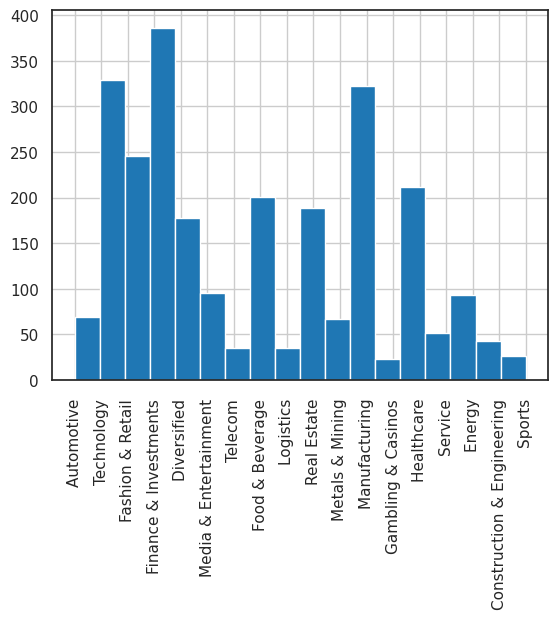

In [31]:
for column in ['country','industry']:

    df[column].hist(bins=len(df[column].unique()))
    plt.xticks(rotation='vertical')
    plt.show()

,age,rank
age,1.000000,-0.124947
rank,-0.124947,1.000000


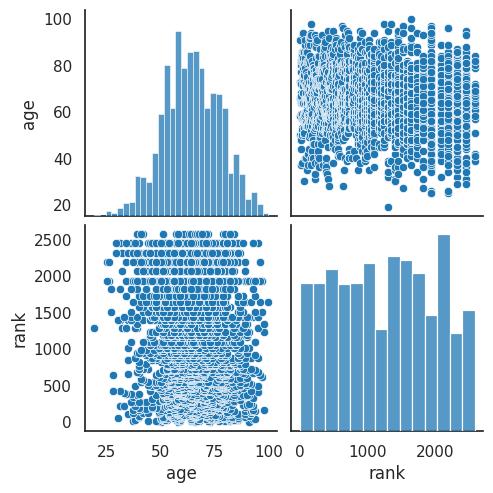

In [32]:
sns.pairplot(df[['age','rank']])
df[['age','rank']].corr()

In [33]:
B_names,networths,sources,industrys=df['name'],df['networth'],df['source'],df['industry']
B_names,networths,sources,industrys

(0                      Elon Musk 
 1                     Jeff Bezos 
 2       Bernard Arnault & family 
 3                     Bill Gates 
 4                 Warren Buffett 
                   ...            
 2595      Jorge Gallardo Ballart 
 2596                Nari Genomal 
 2597              Ramesh Genomal 
 2598              Sunder Genomal 
 2599       Horst-Otto Gerberding 
 Name: name, Length: 2600, dtype: object,
 0       $219 B
 1       $171 B
 2       $158 B
 3       $129 B
 4       $118 B
          ...  
 2595      $1 B
 2596      $1 B
 2597      $1 B
 2598      $1 B
 2599      $1 B
 Name: networth, Length: 2600, dtype: object,
 0                Tesla, SpaceX
 1                       Amazon
 2                         LVMH
 3                    Microsoft
 4           Berkshire Hathaway
                  ...          
 2595           pharmaceuticals
 2596                   apparel
 2597                   apparel
 2598                  garments
 2599    flavors and fragrances

In [34]:
y=df['rank']
y.head()

0    1
1    2
2    3
3    4
4    5
Name: rank, dtype: int64

In [35]:
df.drop(columns=['name','networth','source'],inplace=True)
df.head()

,rank,age,country,industry
0,1,50,United States,Automotive
1,2,58,United States,Technology
2,3,73,France,Fashion & Retail
3,4,66,United States,Technology
4,5,91,United States,Finance & Investments


In [36]:
one_hot = ColumnTransformer(transformers=[("one_hot", OneHotEncoder(), ['country','industry']) ],remainder="passthrough")
data=one_hot.fit_transform(df)

In [40]:
names=one_hot.get_feature_names_out()
column_names=[name[name.find("_")+1:] for name in  [name[name.find("__")+2:] for name in names]]
new_data=pd.DataFrame(data.toarray(),columns=column_names)
new_data.head()

,Algeria,Argentina,Australia,Austria,Barbados,Belgium,Belize,Brazil,Bulgaria,Canada,...,Manufacturing,Media & Entertainment,Metals & Mining,Real Estate,Service,Sports,Technology,Telecom,rank,age
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,58.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,73.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,66.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,91.0


In [41]:
kernel_pca = KernelPCA(kernel="rbf" ,fit_inverse_transform=True, alpha=0.1)
kernel_score=kernel_pca.fit_transform(new_data)

In [42]:
ranking=13

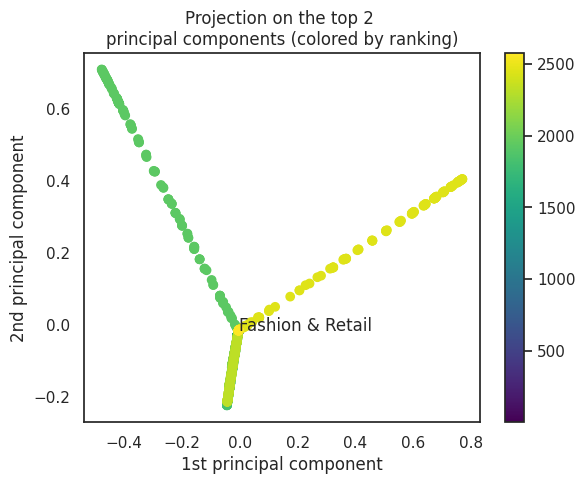

In [43]:
fig, ax = plt.subplots()

sc=ax.scatter(kernel_score[:,0],kernel_score[:,1] ,c=y,cmap='viridis')
fig.colorbar(sc, orientation='vertical')
ax.annotate(industrys[ranking], (kernel_score[ranking,0],kernel_score[ranking,1]))
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.title("Projection on the top 2 \nprincipal components (colored by ranking)")
plt.show()

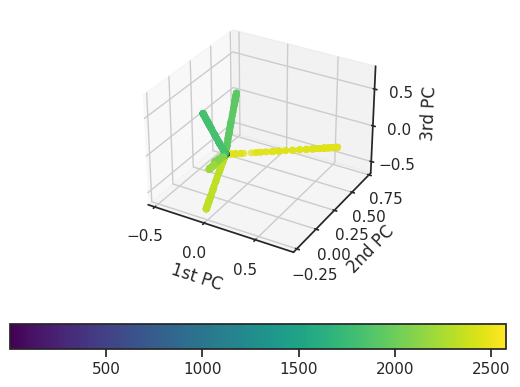

In [44]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
sc=ax.scatter(kernel_score[:,0], kernel_score[:,1],  kernel_score[:,2], c=y, cmap='viridis', linewidth=0.5);
fig.colorbar(sc, orientation='horizontal')
ax.set_xlabel('1st PC')
ax.set_ylabel('2nd PC')
ax.set_zlabel('3rd PC')
plt.show()

In [45]:
pca = PCA()
score_pca = pca.fit_transform(new_data)

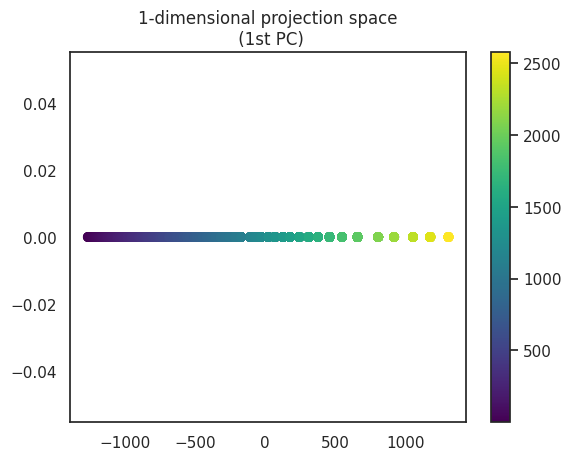

In [46]:
fig, ax = plt.subplots()
sc=ax.scatter(score_pca[:,0],np.zeros(score_pca[:,1].shape ),c=y,cmap='viridis')
ax.set_title('1-dimensional projection space\n (1st PC)')
fig.colorbar(sc, orientation='vertical')
plt.show()

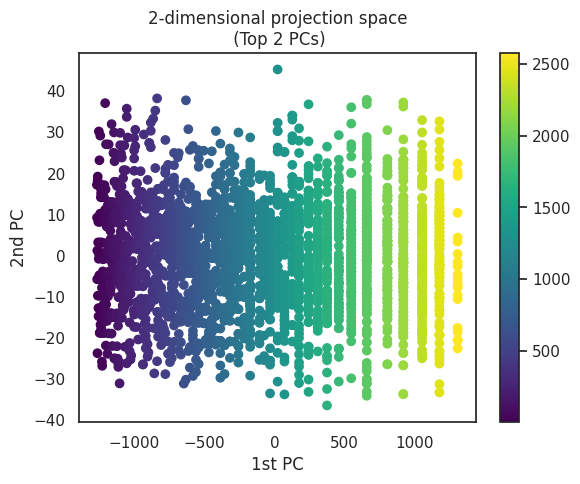

In [47]:
fig, ax = plt.subplots()
sc=ax.scatter(score_pca[:,0],score_pca[:,1] ,c=y,cmap='viridis')
fig.colorbar(sc, orientation='vertical')
ax.set_title('2-dimensional projection space\n (Top 2 PCs)')
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.show()

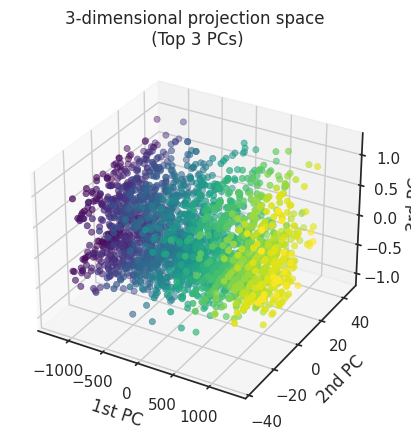

In [48]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
sc=ax.scatter(score_pca[:,0], score_pca[:,1],  score_pca[:,2], c=y, cmap='viridis', linewidth=0.5);
ax.set_title('3-dimensional projection space\n (Top 3 PCs)')
ax.set_xlabel('1st PC')
ax.set_ylabel('2nd PC')
ax.set_zlabel('3rd PC')
plt.show()

In [49]:
from sklearn.linear_model import Ridge

In [50]:
X_train, X_test, y_train, y_test = train_test_split(kernel_score, y, test_size=0.4, random_state=0)
lr = Ridge(alpha=0).fit(X_train, y_train)
print(str.format("Test set R^2 score for Kernel PCA: {}", lr.score(X_test, y_test)))

Test set R^2 score for Kernel PCA: 0.9885118791790902


In [51]:
X_train, X_test, y_train, y_test = train_test_split(score_pca, y, test_size=0.40, random_state=0)
lr= Ridge(alpha=0).fit(X_train, y_train)
print(str.format("Test set R^2 score for PCA: {}", lr.score(X_test, y_test)))

Test set R^2 score for PCA: 0.9979311178373916


In [52]:
X_train_noisy = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/X_train_noisy.csv').to_numpy()
X_test_noisy = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/X_test_noisy.csv').to_numpy()

In [57]:
X_train_noisy.shape

(1000, 256)

In [58]:
X_test_noisy.shape

(100, 256)

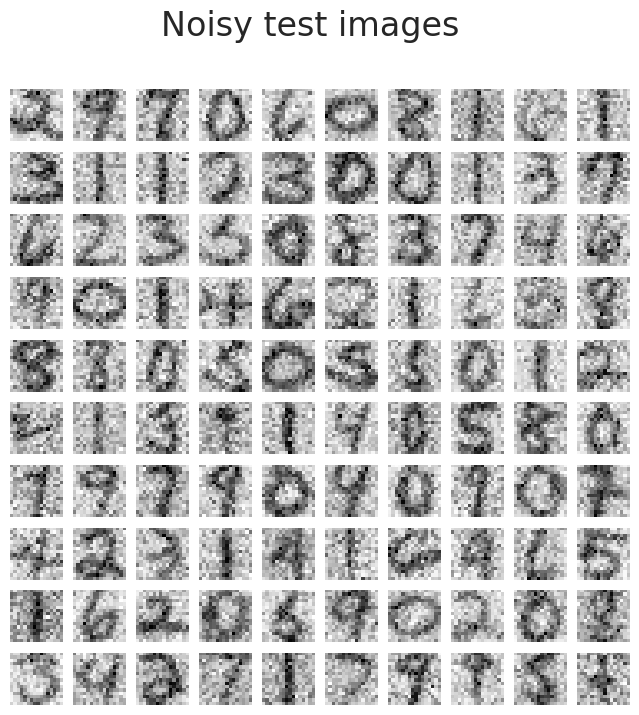

In [59]:
def plot_digits(X, title):
    """Small helper function to plot 100 digits."""
    fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((16, 16)), cmap="Greys")
        ax.axis("off")
    fig.suptitle(title, fontsize=24)

plot_digits(X_test_noisy, "Noisy test images")

In [62]:
pca=PCA(n_components=35)
pca.fit(X_train_noisy)

kernel_pca=KernelPCA(n_components=400, kernel="rbf", gamma=0.01, fit_inverse_transform=True, alpha=0.1)
kernel_pca.fit(X_train_noisy)

KernelPCA(alpha=0.1, fit_inverse_transform=True, gamma=0.01, kernel='rbf',
          n_components=400)

In [63]:
X_hat_pca = pca.inverse_transform(pca.transform(X_test_noisy))

X_hat_kpca = kernel_pca.inverse_transform(kernel_pca.transform(X_test_noisy))

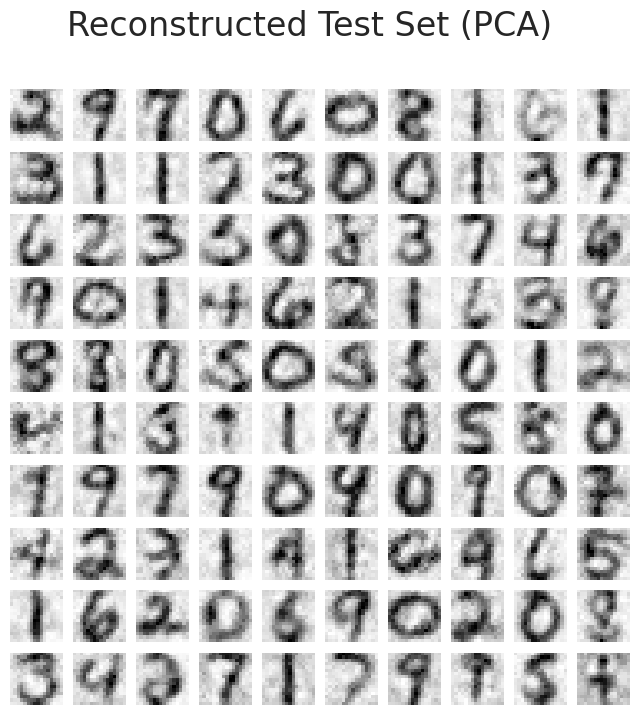

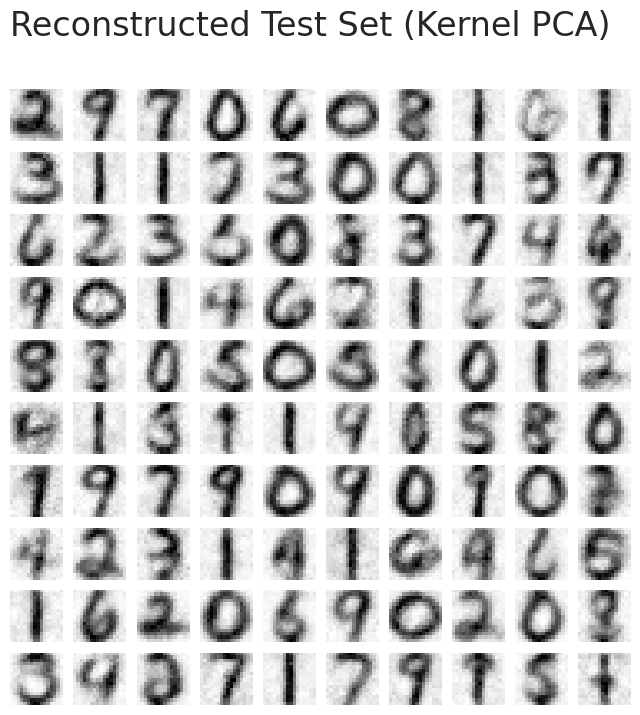

In [64]:
plot_digits(X_hat_pca, "Reconstructed Test Set (PCA)")

plot_digits(X_hat_kpca, "Reconstructed Test Set (Kernel PCA)")